# Organize ML projects with Scikit-Learn

While Machine Learning is powerful, people often overestimate it: apply machine learning to your project, and all your problems will be solved. In reality, it's not this simple. To be effective, one needs to organize the work very well. In this notebook, we will walkthrough practical aspects of a ML project. To look at the big picture, let's start with a checklist below. It should work reasonably well for most ML projects, but make sure to adapt it to your needs:

1. **Define the scope of work and objective**
    * How is your solution be used?
    * How should performance be measured? Are there any contraints?
    * How would the problem be solved manually?
    * List the available assumptions, and verify if possible.
    
    
2. **Get the data**
    * Document where you can get that data
    * Store data in a workspace you can easily access
    * Convert the data to a format you can easily manipulate
    * Check the overview (size, type, sample, description, statistics)
    * Data cleaning
    
    
3. **EDA & Data transformation**
    * Study each attribute and its characteristics (missing values, type of distribution, usefulness)
    * Visualize the data
    * Study the correlations between attributes
    * Feature selection, Feature Engineering, Feature scaling
    * Write functions for all data transformations
    
    
4. **Train models**
    * Automate as much as possible
    * Train promising models quickly using standard parameters. Measure and compare their performance
    * Analyze the errors the models make
    * Shortlist the top three of five most promising models, preferring models that make different types of errors.


5. **Fine-tunning**
    * Treat data transformation choices as hyperparameters, expecially when you are not sure about them (e.g., replace missing values with zeros or with the median value)
    * Unless there are very few hyperparameter value to explore, prefer random search over grid search.
    * Try ensemble methods
    * Test your final model on the test set to estimate the generalizaiton error. Don't tweak your model again, you would start overfitting the test set.

## Example: Articles categorization

### Objectives

Build a model to determine the categories of articles. 

### Get Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
bbc = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/bbc-text.csv')

In [3]:
bbc.sample(5)

,category,text
2170,tech,games win for blu-ray dvd format the next-gene...
694,sport,holmes urged to compete at worlds jolanda cepl...
606,tech,court mulls file-sharing future judges at the ...
1327,tech,have hackers recruited your pc more than one ...
57,sport,henson stakes early lions claim the six nation...


In [4]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
# Your code here
bbc.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,apple attacked over sources row civil libertie...
freq,511,2


In [14]:
import nltk
from nltk.corpus import stopwords
import string
import re
#call the nltk downloader
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lanan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Preprocess text
def cleaning_data(text):
    text = text.lower()
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    # remove number
    text = re.sub('\d', ' ', text)
    result = ''
    for word in text.split():
        if word not in stop_words:
            result += word + " "
    return result

In [16]:
bbc['text'] = bbc['text'].apply(lambda x: cleaning_data(str(x)))

In [17]:
bbc.head()

,category,text
0,tech,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldcom...
2,sport,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle fa cup premiership side...
4,entertainment,ocean twelve raids box office ocean twelve cri...


## EDA & transformation
- Study each attribute and its characteristics (missing values, type of distribution, usefulness)
- Visualize the data
- Study the correlations between attributes
- Feature selection, Feature Engineering, Feature scaling
- Write functions for all data transformations

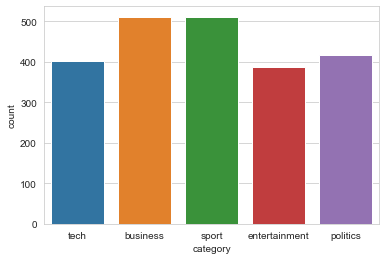

In [19]:
sns.countplot(x='category', data=bbc)

In [30]:
bbc['length'] = bbc['text'].apply(lambda x: len(x.split()))
bbc['length'].max()

2192

In [34]:
bbc

,category,text,length
0,tech,tv future hands viewers home theatre systems p...,407
1,business,worldcom boss left books alone former worldcom...,187
2,sport,tigers wary farrell gamble leicester say rushe...,130
3,sport,yeading face newcastle fa cup premiership side...,263
4,entertainment,ocean twelve raids box office ocean twelve cri...,170
...,...,...,...
2220,business,cars pull us retail figures us retail sales fe...,169
2221,politics,kilroy unveils immigration policy exchatshow h...,99
2222,entertainment,rem announce new glasgow concert us band rem a...,167
2223,politics,political squabbles snowball become commonplac...,391


In [24]:
# label encoding
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
X = bbc['text']
y = bbc['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
y_train_lb = l.fit_transform(y_train)
y_test_lb = l.transform(y_test)
tf = TfidfVectorizer(max_df=0.95, min_df=0.05)
X_train_df = tf.fit_transform(X_train)
X_test_df = tf.transform(X_test)

In [29]:
X_train_df.shape

(1780, 566)

## Train model

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train_df, y_train_lb)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
from sklearn.metrics import classification_report
print(classification_report(tree.predict(X_test_df), y_test_lb))
print(pd.crosstab(y_train_lb, tree.predict(X_train_df), rownames=['True'], colnames=['Predict']))
print(pd.crosstab(y_test_lb, tree.predict(X_test_df), rownames=['True'], colnames=['Predict']))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        98
           1       0.85      0.84      0.84        80
           2       0.78      0.86      0.82        84
           3       0.93      0.85      0.89       117
           4       0.75      0.79      0.77        66

    accuracy                           0.83       445
   macro avg       0.82      0.82      0.82       445
weighted avg       0.83      0.83      0.83       445

Predict    0    1    2    3    4
True                            
0        404    0    0    9    0
1          0  296    1   10    0
2          0    1  320    4    0
3          1    0    0  402    0
4          0    0    0    4  328
Predict   0   1   2    3   4
True                        
0        77   2   6    5   7
1         5  67   1    4   2
2         7   4  72    4   5
3         4   1   3  100   0
4         5   6   2    4  52


### ENSEMBLE METHOD

In [59]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
dict_model = {'DecisionTree': DecisionTreeClassifier(), 
              'RandomForest': RandomForestClassifier(),
              'GradientBoost': GradientBoostingClassifier(),
              'ExtraTree': ExtraTreesClassifier()}

for key in dict_model:
    model = dict_model[key].fit(X_train_df, y_train_lb)
    y_pred = model.predict(X_test_df)
    print(f'MSE of {key}: ', mean_squared_error(y_test_lb, y_pred))

MSE of DecisionTree:  1.0674157303370786
MSE of RandomForest:  0.32134831460674157
MSE of GradientBoost:  0.21348314606741572
MSE of ExtraTree:  0.30337078651685395


In [60]:
from lightgbm import LGBMClassifier

model = LGBMClassifier().fit(X_train_df, y_train_lb)
y_pred = model.predict(X_test_df)
print('MSE: ', mean_squared_error(y_test_lb, y_pred))

MSE:  0.2943820224719101


In [61]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train_df, y_train_lb)
sgd.score(X_test_df, y_test_lb)

0.9415730337078652